<a href="https://colab.research.google.com/github/POPE001/Car-Plate-Detection/blob/main/Car_plate_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and Import Dependensies

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,907 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.6 MB/s eta 0:00:00


In [ ]:
import cv2
import imutils
import easyocr
import pytesseract
import numpy as np
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
from sklearn.metrics import precision_recall_curve,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

drive_path = '/content/drive/MyDrive'
files = os.listdir(drive_path)

In [ ]:
print(files)

['All_combined.csv', 'Drone (UAV) Pilot & Aerial Photography Training & Certification.gform', 'Backend Adeoni Mayowa.pdf', 'Adeoni Mayowa.pdf', 'LETTER OF DEFERMENT (2).gdoc', 'LETTER OF DEFERMENT (1).docx', 'LETTER OF DEFERMENT (1).gdoc', 'LETTER OF DEFERMENT.docx', 'LETTER OF DEFERMENT.gdoc', 'Frontend Adeoni Mayowa (1).pdf', 'CoinbaseWalletBackups', 'Code Unit  8-20221021 (1).zip', 'THE EARLY CHURCH LIFESTYLE OF PRAYER.gdoc', 'THE EARLY CHURCH LIFESTYLE OF PRAYER.docx', 'THE EARLY CHURCH LIFESTYLE OF PRAYER (1) (1) (1) (1) (1) (1) (1).gdoc', 'ASSIGNMENT 1.docx', 'ASSIGNMENT 1.gdoc', 'package oop.gdoc', 'Heralds Letter.gdoc', 'ASSIGNMENT 2 (1).edited.docx', 'ASSIGNMENT 2.edited.docx', 'ASSIGNMENT 2 (1).gdoc', 'ASSIGNMENT 2.gdoc', 'ASSIGNMENT 2 (1).docx', 'ASSIGNMENT 2.docx', 'ASSIGNMENT 2.edited (1).docx', 'ASSIGNMENT 3.gdoc', 'Obafemi Awolowo University.gdoc', 'PROJECT PROPOSAL.gdoc', 'Untitled document (16).gdoc', 'ASSIGNMENT 00.gdoc', 'CSI-5-OOP Object Oriented Programming.gdoc', 

In [ ]:
image_path = '/content/drive/MyDrive/car_plates_dataset/car10.jpg'
original_image = cv2.imread(image_path)

if original_image is not None:
    print("Image read successfully.")
else:
    print("Failed to read the image. Please check the file path.")


Image read successfully.


## Reading the image

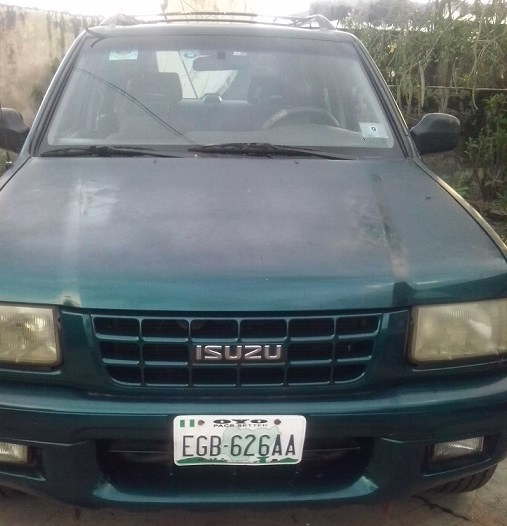

(526, 507, 3)


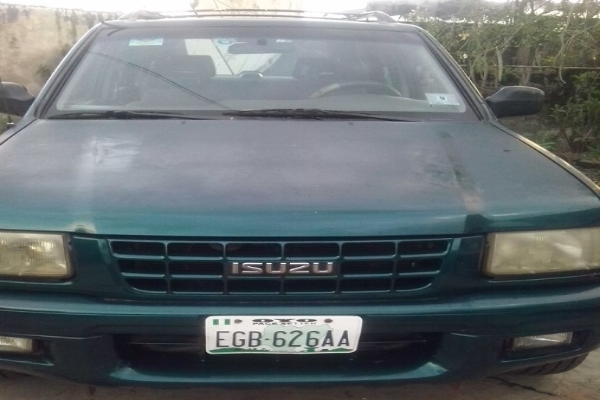

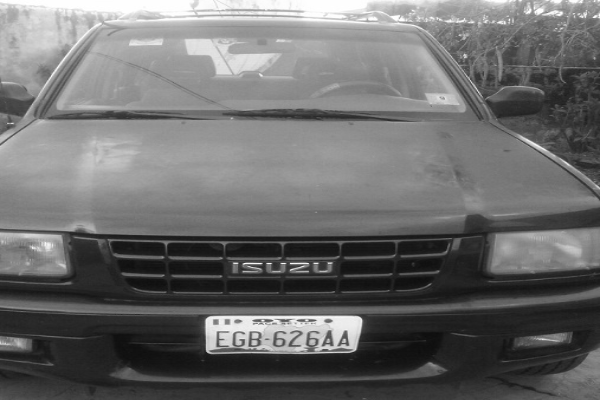

In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/car_plates_dataset/car10.jpg')
if original_image is not None:
    cv2_imshow(original_image)
else:
    print("Failed to read the image. Please check the file path.")
print(original_image.shape)


resized_image = cv2.resize(original_image,(600, 400))   # change image size into 600*400
cv2_imshow(resized_image)

gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # convert the image into grayscale
cv2_imshow(gray)

# plate detection

### Apply bilater filter for Noise reduction and find edges

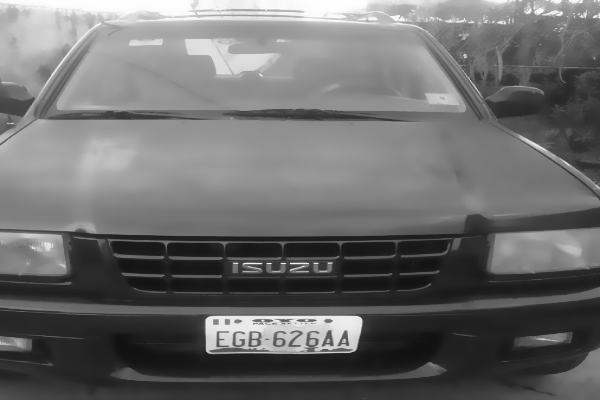

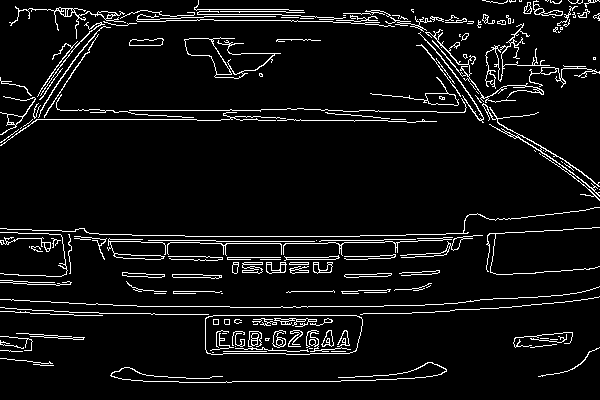

In [ ]:
bfilter = cv2.bilateralFilter(gray, 13, 15, 15)  # apply bilateral filter for Noise reduction
cv2_imshow(bfilter)
edged = cv2.Canny(bfilter, 30, 200)  # Edge detection
cv2_imshow(edged)

### Finding contours


In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)

# arrange contours descending based on contour area and get largest 10
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


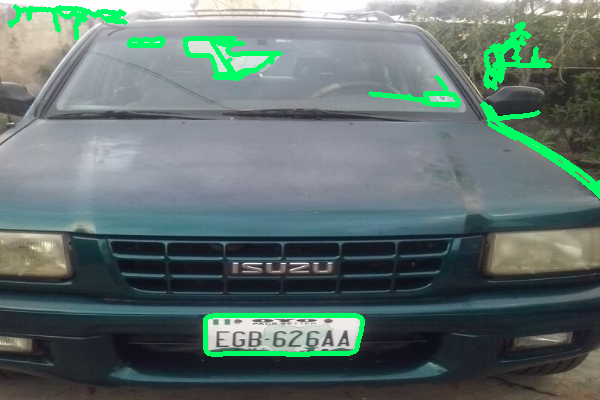

In [ ]:
image1 = resized_image.copy()
# drawing the identified contours on our image
cv2.drawContours(image1,contours,-1,(100,255,0),3)
cv2_imshow(image1)

In [ ]:
plate_location = None
for contour in contours:
  epsilon =  0.018*cv2.arcLength(contour, True)  # Ratio of contour Perimeter
  approx = cv2.approxPolyDP(contour, epsilon, True)  # approximate contour shape

  if len(approx) == 4:
    plate_location = approx
    break


In [ ]:
plate_location

array([[[205, 349]],

       [[349, 353]],

       [[362, 319]],

       [[205, 318]]], dtype=int32)

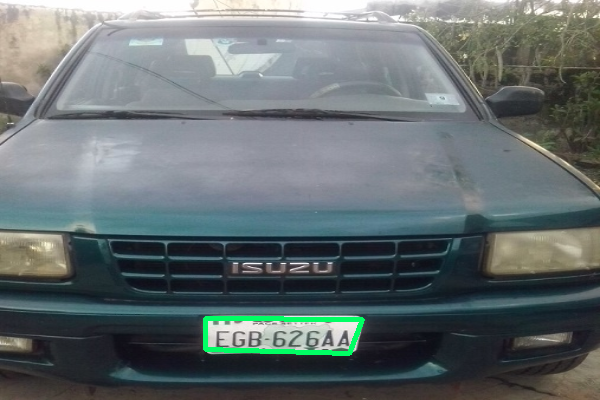

In [ ]:
image2 = resized_image.copy()
# drawing the plate contour on our image
cv2.drawContours(image2,[plate_location],-1,(100,255,0),3)
cv2_imshow(image2)

### Masking

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [plate_location], -1, 255, -1)
new_image = cv2.bitwise_and(resized_image, resized_image, mask=mask)

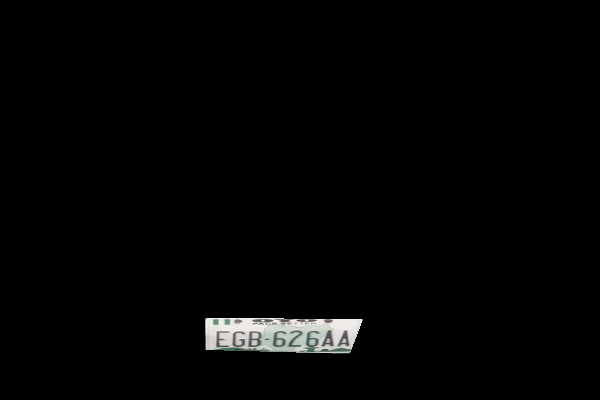

In [ ]:
cv2_imshow(new_image)

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

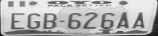

In [ ]:
cv2_imshow(cropped_image)

# Apply OCR

### Use pytessract To Read Text

In [ ]:
data = pytesseract.image_to_string(cropped_image, lang='eng', config='--psm 8')
print(data)

EGB-6Z6AA |



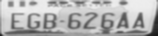

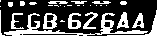

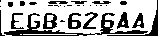

/EGB-6ZGAA |



In [ ]:

blur = cv2.GaussianBlur(cropped_image, (3,3), 0)
cv2_imshow(blur)
thresh = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

# Morph open to remove noise and invert image
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# cv2_imshow(opening)
invert = 255 - thresh  #opening
cv2_imshow(invert)

data = pytesseract.image_to_string(invert, lang='eng', config='--psm 8')

print(data)

### Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
text = result[0][-2]
text

'EGB-6Z6AA'

In [ ]:
# Assuming you have the ground truth for the license plate text
ground_truth = "EGB-626AA"  # Replace this with the actual ground truth


In [ ]:
# Extracted text from pytesseract
data_tesseract = pytesseract.image_to_string(invert, lang='eng', config='--psm 8')
data_tesseract = data_tesseract.strip()


In [ ]:
# Extracted text from Easy OCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
data_easyocr = result[0][-2]
data_easyocr = data_easyocr.strip()

In [ ]:
# Calculate accuracy for pytesseract
correct_characters_tesseract = sum(1 for c1, c2 in zip(ground_truth, data_tesseract) if c1 == c2)
accuracy_tesseract = correct_characters_tesseract / len(ground_truth) * 100

In [ ]:
# Calculate accuracy for Easy OCR
correct_characters_easyocr = sum(1 for c1, c2 in zip(ground_truth, data_easyocr) if c1 == c2)
accuracy_easyocr = correct_characters_easyocr / len(ground_truth) * 100


In [ ]:
print(f"Accuracy with pytesseract: {accuracy_tesseract:.2f}%")
print(f"Accuracy with Easy OCR: {accuracy_easyocr:.2f}%")

Accuracy with pytesseract: 11.11%
Accuracy with Easy OCR: 88.89%


In [ ]:
# Calculate precision for pytesseract
total_characters_tesseract = len(data_tesseract)
correct_characters_tesseract = sum(1 for c1, c2 in zip(ground_truth, data_tesseract) if c1 == c2)
precision_tesseract = correct_characters_tesseract / total_characters_tesseract * 100


In [ ]:
# Calculate precision for Easy OCR
total_characters_easyocr = len(data_easyocr)
correct_characters_easyocr = sum(1 for c1, c2 in zip(ground_truth, data_easyocr) if c1 == c2)
precision_easyocr = correct_characters_easyocr / total_characters_easyocr * 100


In [ ]:
print(f"Precision with pytesseract: {precision_tesseract:.2f}%")
print(f"Precision with Easy OCR: {precision_easyocr:.2f}%")

Precision with pytesseract: 8.33%
Precision with Easy OCR: 88.89%


In [ ]:
# Calculate recall for pytesseract
total_characters_ground_truth = len(ground_truth)
recall_tesseract = correct_characters_tesseract / total_characters_ground_truth * 100

In [ ]:
# Calculate F1 score for pytesseract
f1_tesseract = 2 * (precision_tesseract * recall_tesseract) / (precision_tesseract + recall_tesseract)

In [ ]:
# Calculate precision for Easy OCR
total_characters_easyocr = len(data_easyocr)
correct_characters_easyocr = sum(1 for c1, c2 in zip(ground_truth, data_easyocr) if c1 == c2)
precision_easyocr = correct_characters_easyocr / total_characters_easyocr * 100

In [ ]:
# Calculate recall for Easy OCR
recall_easyocr = correct_characters_easyocr / total_characters_ground_truth * 100


In [ ]:
# Calculate F1 score for Easy OCR
f1_easyocr = 2 * (precision_easyocr * recall_easyocr) / (precision_easyocr + recall_easyocr)


In [ ]:
print(f"Recall Score with pytesseract: {recall_tesseract:.2f}%")
print(f"Recall Score with Easy OCR: {recall_easyocr:.2f}%")

print(f"F1 score with pytesseract: {f1_tesseract:.2f}%")
print(f"F1 score with Easy OCR: {f1_easyocr:.2f}%")


Recall Score with pytesseract: 11.11%
Recall Score with Easy OCR: 88.89%
F1 score with pytesseract: 9.52%
F1 score with Easy OCR: 88.89%


In [ ]:
# Pad or truncate the OCR output to match the length of the ground truth
if len(data_tesseract) > len(ground_truth):
    data_tesseract = data_tesseract[:len(ground_truth)]
elif len(data_tesseract) < len(ground_truth):
    data_tesseract = data_tesseract + ' ' * (len(ground_truth) - len(data_tesseract))


In [ ]:
# Convert characters to binary values (1 for correct characters, 0 otherwise)
binary_ground_truth = [1 if c1 == c2 else 0 for c1, c2 in zip(ground_truth, data_tesseract)]


In [ ]:
# Calculate precision and recall for different classification thresholds
precisions, recalls, _ = precision_recall_curve(binary_ground_truth, [ord(c) / 255 for c in data_tesseract])


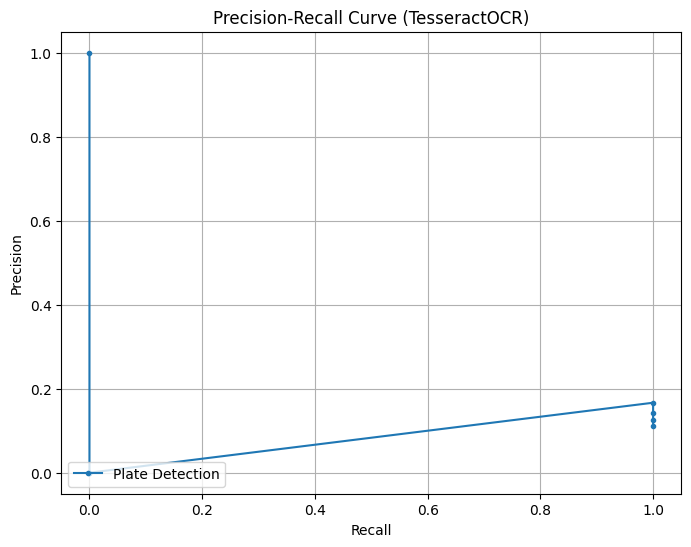

In [ ]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Plate Detection')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (TesseractOCR)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
# Create binary lists for OCR output
binary_ocr_output = [1 if c == ' ' else 0 for c in data_tesseract]


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(binary_ground_truth, binary_ocr_output)


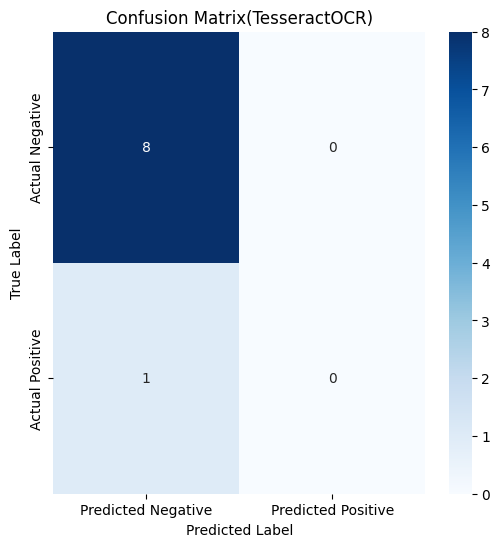

In [ ]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix(TesseractOCR)')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Assuming you have the ground truth for the license plate text
ground_truth = "EGB-626AA"  # Replace this with the actual ground truth

# Extracted text from Easy OCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
data_easyocr = result[0][-2]
data_easyocr = data_easyocr.strip()

# Pad or truncate the OCR output to match the length of the ground truth
max_length = max(len(ground_truth), len(data_easyocr))
data_easyocr = data_easyocr.ljust(max_length)  # Pad with spaces if needed
ground_truth = ground_truth.ljust(max_length)  # Pad with spaces if needed

# Convert characters to binary values (1 for correct characters, 0 otherwise)
binary_ground_truth = [1 if c1 == c2 else 0 for c1, c2 in zip(ground_truth, data_easyocr)]

# Calculate precision and recall for different classification thresholds
precisions_en, recalls_en, _ = precision_recall_curve(binary_ground_truth, [ord(c) / 255 for c in data_easyocr])

# Now, you can use the precisions and recalls arrays to plot the precision-recall curve.


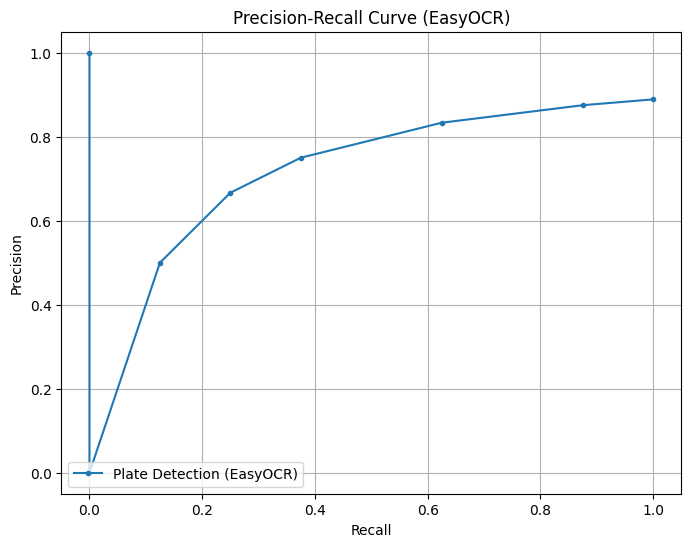

In [ ]:
# Plot the precision-recall curve for EasyOCR
plt.figure(figsize=(8, 6))
plt.plot(recalls_en, precisions_en, marker='.', label='Plate Detection (EasyOCR)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (EasyOCR)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [ ]:
# Pad or truncate the OCR output to match the length of the ground truth
max_length = max(len(ground_truth), len(data_easyocr))
data_easyocr = data_easyocr.ljust(max_length)  # Pad with spaces if needed
ground_truth = ground_truth.ljust(max_length)  # Pad with spaces if needed

# Create binary lists for OCR output
binary_ocr_output = [1 if c == ' ' else 0 for c in data_easyocr]

# Convert characters to binary values (1 for correct characters, 0 otherwise)
binary_ground_truth = [1 if c1 == c2 else 0 for c1, c2 in zip(ground_truth, data_easyocr)]

# Create the confusion matrix
cm = confusion_matrix(binary_ground_truth, binary_ocr_output)


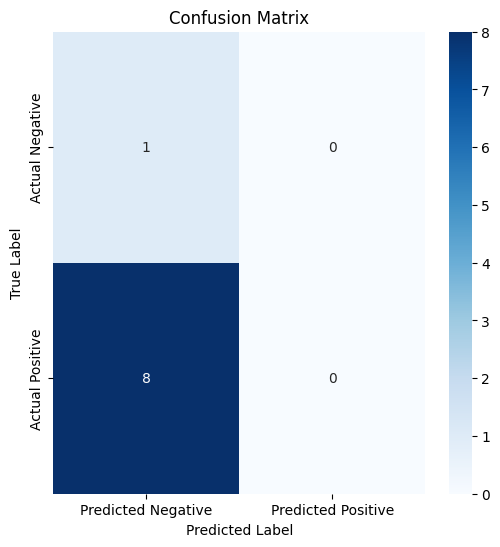

In [ ]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
